# Introduction:

In today's technology-driven landscape, the impact of Artificial Intelligence (AI) on job roles across various sectors is profound. 
This project dives into a dataset that reveals the depth of AI's influence on different job titles, highlighting the potential 
risk of automation and the relationship between tasks and AI applications. Through visual explorations, the goal is to provide a 
snapshot of how AI might be reshaping the future of work across diverse domains.

In [2]:
#import module 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/Users/abhishekshah/Desktop/job_data_EDA /Job_Data.csv")

# Display the first few rows of the dataset
data.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [3]:
## Check for missing values
missing_values = data.isnull().sum()

# Check data types of each column
data_types = data.dtypes

missing_values, data_types


(Job titiles          0
 AI Impact            0
 Tasks                0
 AI models            0
 AI_Workload_Ratio    0
 Domain               0
 dtype: int64,
 Job titiles           object
 AI Impact             object
 Tasks                  int64
 AI models              int64
 AI_Workload_Ratio    float64
 Domain                object
 dtype: object)

In [5]:
# Convert "AI Impact" column to numerical by removing the '%' symbol and converting to float
data['AI Impact'] = data['AI Impact'].str.rstrip('%').astype('float') / 100.0

# Check summary statistics for the numerical columns
summary_statistics = data.describe()

summary_statistics


,AI Impact,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000,4706.000000
mean,0.303126,400.708032,1817.678071,inf
std,0.182038,311.564781,1086.853037,NaN
min,0.050000,1.000000,0.000000,0.036585
25%,0.150000,161.000000,1085.250000,0.137271
50%,0.250000,270.000000,1577.500000,0.199281
75%,0.400000,608.750000,2273.000000,0.260572
max,0.980000,1387.000000,5666.000000,inf


#The infinite values in the "AI_Workload_Ratio" column. We can replace them with NaN (Not a Number)

In [6]:
import numpy as np

# Replace infinite values with NaN
data['AI_Workload_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Count the number of NaN values in the 'AI_Workload_Ratio' column
nan_count = data['AI_Workload_Ratio'].isna().sum()

nan_count


7

#Univariate Analysis- the distributions of 'AI Impact', 'Tasks', 'AI models', and the count of job titles in each 'Domain'.

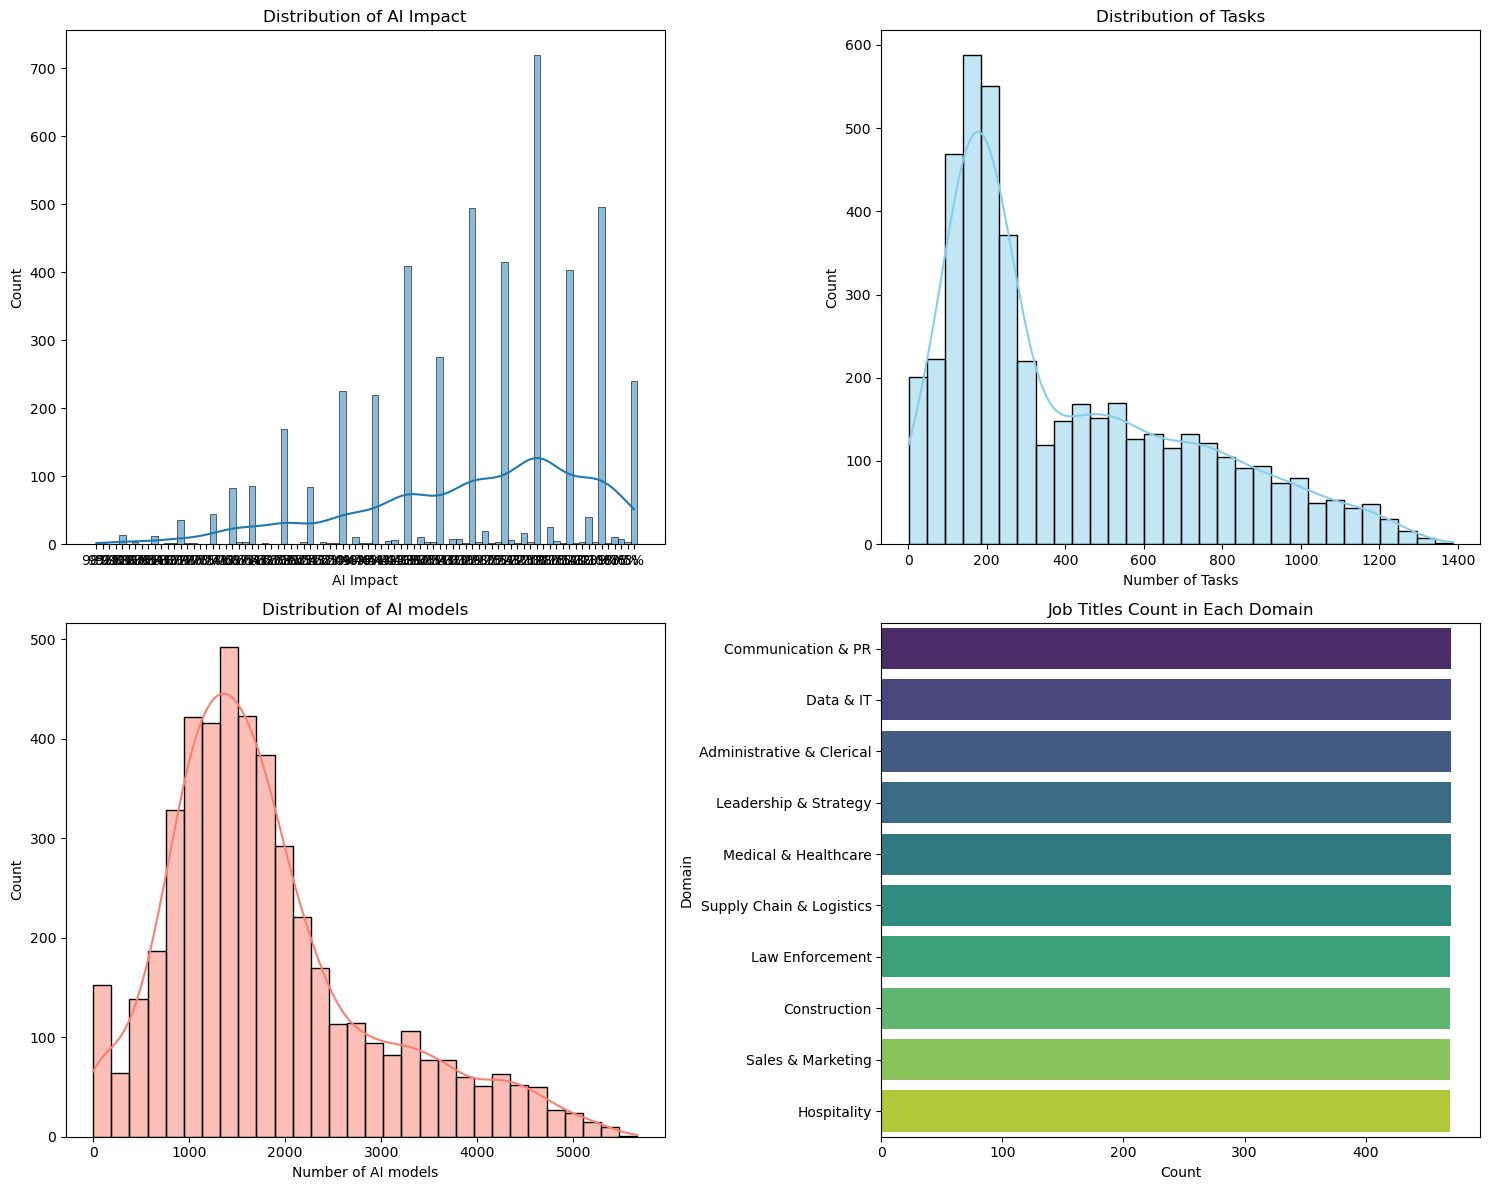

In [4]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Distribution of 'AI Impact'
plt.subplot(2, 2, 1)
sns.histplot(data['AI Impact'], bins=30, kde=True)
plt.title('Distribution of AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('Count')

# Distribution of 'Tasks'
plt.subplot(2, 2, 2)
sns.histplot(data['Tasks'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tasks')
plt.xlabel('Number of Tasks')
plt.ylabel('Count')

# Distribution of 'AI models'
plt.subplot(2, 2, 3)
sns.histplot(data['AI models'], bins=30, kde=True, color='salmon')
plt.title('Distribution of AI models')
plt.xlabel('Number of AI models')
plt.ylabel('Count')

# Count of job titles in each 'Domain'
plt.subplot(2, 2, 4)
sns.countplot(y=data['Domain'], order=data['Domain'].value_counts().index, palette='viridis')
plt.title('Job Titles Count in Each Domain')
plt.xlabel('Count')
plt.ylabel('Domain')

plt.tight_layout()
plt.show()

#Bivariate Analysis to explore relationships between pairs of variables. Specifically, we'll look at how 'AI Impact' relates to 'Tasks' and the correlation between 'AI models' and 'Tasks'.

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Scatter plot of 'AI Impact' vs 'Tasks'
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Tasks'], y=data['AI Impact'], alpha=0.5)
plt.title('AI Impact vs Tasks')
plt.xlabel('Tasks')
plt.ylabel('AI Impact')

# Scatter plot of 'AI models' vs 'Tasks'
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Tasks'], y=data['AI models'], alpha=0.5, color='salmon')
plt.title('AI models vs Tasks')
plt.xlabel('Tasks')
plt.ylabel('AI models')

plt.tight_layout()
plt.show()


# Insights:

Distribution of AI Impact:

The AI Impact is most densely concentrated between 10% and 40%. This means that a majority of the job titles have a moderate risk of automation due to AI.
There's a smaller number of jobs with extremely high AI impact (close to 100%), suggesting that only a few job roles are at imminent risk of being fully automated.

Distribution of Tasks:
Most jobs have tasks ranging from 0 to around 600, with a noticeable peak between 0 and 200. This implies that a significant portion of jobs in the dataset have relatively fewer tasks associated with them.
A smaller number of jobs have an extremely high number of tasks, indicating that these roles might be more multifaceted or complex.

Distribution of AI Models:
The majority of job titles have between 0 and 2500 associated AI models, with a significant peak in the 0-1000 range. This suggests that while AI applications are prevalent, many job roles have a moderate number of AI models related to their tasks.

A higher number of AI models might indicate a broader application of AI across the tasks associated with those roles.

Job Titles Count in Each Domain:
a) The "Data & IT" domain has the highest count of job titles, indicating that this sector might be the most diversified or the dataset has a bias towards this domain.
b) Domains like "Administrative & Clerical" and "Sales & Marketing" also have a significant number of job titles, suggesting their prominence in the job market or dataset.
c) Some domains, like "Transport & Logistics", have fewer job titles represented in the dataset, which could be due to the specificity of roles in these sectors or underrepresentation in the dataset.

# Conclusions:

Risk of AI Automation:
The risk of AI automation varies across job titles. While most roles face a moderate risk, it's essential to be aware of roles with an extremely high AI impact, as they might need strategic interventions like reskilling or job redesign.

Task Complexity:
Jobs with a higher number of tasks might be seen as more complex. While a higher number of tasks might correlate with more AI models, it doesn't necessarily mean a higher risk of automation. The nature and complexity of tasks are crucial determinants.

AI in Different Domains:
The "Data & IT" domain, unsurprisingly, has a high representation. It's possible that roles in this domain are at the forefront of AI integration due to the nature of the industry. However, other domains also show potential impacts from AI, emphasizing the widespread influence of AI across sectors.

Future Preparedness: It is important to understanding these patterns can help stakeholders, including organizations, policymakers, and educators, in crafting strategies to future-proof the workforce. Whether it's through reskilling initiatives, job redesign, or creating awareness, insights from such data are invaluable.
